In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [23]:
df = pd.read_csv('./Churn_Modelling.csv')

In [24]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
print(df.shape)

(10000, 14)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [27]:
df.duplicated().sum()

0

In [28]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [29]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [30]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [31]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)#data cleanig is done bcz these columns are not required for prediction purpose

In [32]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Now we have to one-hot-code Geography and Gender columns

In [33]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [34]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


<AxesSubplot:>

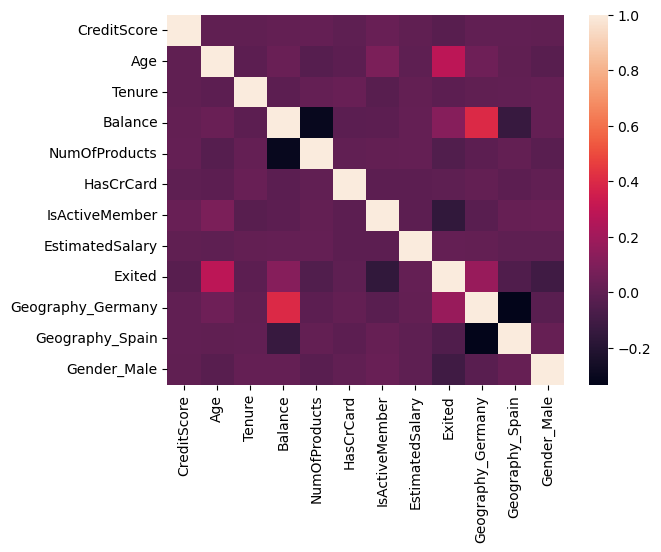

In [36]:
sns.heatmap(df.corr())

Split Train Test data

In [21]:
X = df.drop(columns=['Exited'])
y = df.Exited

In [22]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

In [25]:
X_train.shape

(8000, 11)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [28]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [29]:
model = Sequential()

model.add(Dense(3, activation='sigmoid', input_dim = 11))
model.add(Dense(1, activation = 'sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [32]:
model.fit(X_train_scaled, y_train, epochs = 500)

Epoch 1/500
250/250 [==============================] - 2s 3ms/step - loss: 0.6425 - accuracy: 0.6752
Epoch 2/500
250/250 [==============================] - 1s 3ms/step - loss: 0.5289 - accuracy: 0.7972
Epoch 3/500
250/250 [==============================] - 1s 4ms/step - loss: 0.4819 - accuracy: 0.7972
Epoch 4/500
250/250 [==============================] - 1s 4ms/step - loss: 0.4616 - accuracy: 0.7972
Epoch 5/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4509 - accuracy: 0.7972
Epoch 6/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4438 - accuracy: 0.7972
Epoch 7/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4386 - accuracy: 0.7972
Epoch 8/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4348 - accuracy: 0.7984
Epoch 9/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4320 - accuracy: 0.8001
Epoch 10/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4301 - accura

250/250 [==============================] - 1s 3ms/step - loss: 0.4047 - accuracy: 0.8369
Epoch 82/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4047 - accuracy: 0.8375
Epoch 83/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4046 - accuracy: 0.8369
Epoch 84/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4046 - accuracy: 0.8372
Epoch 85/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4045 - accuracy: 0.8380
Epoch 86/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4044 - accuracy: 0.8375
Epoch 87/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4044 - accuracy: 0.8364
Epoch 88/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4043 - accuracy: 0.8375
Epoch 89/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4043 - accuracy: 0.8372
Epoch 90/500
250/250 [==============================] - 1s 4ms/step - loss: 0.4043 - accuracy: 

250/250 [==============================] - 1s 3ms/step - loss: 0.4027 - accuracy: 0.8375
Epoch 161/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4028 - accuracy: 0.8365
Epoch 162/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4028 - accuracy: 0.8367
Epoch 163/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4027 - accuracy: 0.8369
Epoch 164/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4028 - accuracy: 0.8375
Epoch 165/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4027 - accuracy: 0.8374
Epoch 166/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4027 - accuracy: 0.8371
Epoch 167/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4027 - accuracy: 0.8370
Epoch 168/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4027 - accuracy: 0.8365
Epoch 169/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4027 - a

250/250 [==============================] - 1s 3ms/step - loss: 0.4022 - accuracy: 0.8366
Epoch 240/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4021 - accuracy: 0.8375
Epoch 241/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4021 - accuracy: 0.8371
Epoch 242/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4021 - accuracy: 0.8364
Epoch 243/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4021 - accuracy: 0.8375
Epoch 244/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4021 - accuracy: 0.8370
Epoch 245/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4021 - accuracy: 0.8371
Epoch 246/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4021 - accuracy: 0.8367
Epoch 247/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4021 - accuracy: 0.8374
Epoch 248/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4021 - a

250/250 [==============================] - 1s 3ms/step - loss: 0.4012 - accuracy: 0.8361
Epoch 319/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4012 - accuracy: 0.8370
Epoch 320/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4013 - accuracy: 0.8363
Epoch 321/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4012 - accuracy: 0.8369
Epoch 322/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4012 - accuracy: 0.8365
Epoch 323/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4011 - accuracy: 0.8366
Epoch 324/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4011 - accuracy: 0.8365
Epoch 325/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4011 - accuracy: 0.8369
Epoch 326/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4011 - accuracy: 0.8366
Epoch 327/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4011 - a

250/250 [==============================] - 1s 3ms/step - loss: 0.4001 - accuracy: 0.8363
Epoch 398/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4001 - accuracy: 0.8375
Epoch 399/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4001 - accuracy: 0.8365
Epoch 400/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4000 - accuracy: 0.8369
Epoch 401/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4001 - accuracy: 0.8369
Epoch 402/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4001 - accuracy: 0.8372
Epoch 403/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4000 - accuracy: 0.8370
Epoch 404/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4000 - accuracy: 0.8372
Epoch 405/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4000 - accuracy: 0.8374
Epoch 406/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4000 - a

250/250 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8367
Epoch 477/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8369
Epoch 478/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8366
Epoch 479/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8361
Epoch 480/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8364
Epoch 481/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8363
Epoch 482/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8360
Epoch 483/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8365
Epoch 484/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3994 - accuracy: 0.8351
Epoch 485/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3995 - a

In [73]:
model.layers[0].get_weights()

[array([[-1.6820457e-02,  1.5149938e-02,  4.3859523e-02],
        [-6.7724872e-01,  3.1949195e-01, -2.2497880e+00],
        [-1.5910107e-01,  5.1805746e-02, -8.3331250e-02],
        [-3.1507537e-01, -5.5932808e-01,  2.2869964e-01],
        [-4.3812075e+00, -1.8644706e+00, -2.9361534e-01],
        [-1.2583826e-01,  4.3611187e-02, -7.7774003e-02],
        [-9.3395841e-01,  4.6766931e-01, -4.1514170e-01],
        [ 2.8942928e-02,  3.0965444e-02, -3.1963289e-02],
        [ 4.4753966e-01,  6.7038827e-02, -1.7280003e-01],
        [-3.6995232e-03, -1.5054476e-01,  7.6805532e-02],
        [-1.6751967e-01,  2.2058088e-01,  5.0145764e-02]], dtype=float32),
 array([-2.1895142 ,  2.0111566 ,  0.45521712], dtype=float32)]

In [74]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 3ms/step


In [75]:
y_pred = np.where(y_log>0.5,1,0)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.861